# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## TODOs

You need to implement all TODOs in the python files. Then run all cells in this notebook and plot your results.

Note:

1. You can run the training in your terminal and selectively run the visualization and evaluation cells in this notebook.
2. You need to remove the "REFERENCE" in figures.
3. You don't need to exactly reproduce our results, but your implementation should show the similar progress in training.
4. We use multi-processing to enable asynchronous data sampling. Therefore in many places the tensors have shape `[num_steps, num_envs, num_feat]`. This means that `num_envs` environments are running concurrently and each of them samples a fragment of trajectory with length `num_steps`. There are totally `num_steps*num_envs` transitions are generated in each training iteration.
5. Each process can only have a single MetaDrive environment.
6. The jupyter notebook is used for tutorial and visualization. It is optional for you to use the notebook to call `train_ppo|td3.py` and `eval_ppo|td3.py`. But we expect to see figures, results and visualization in this notebook.




We are expecting the following figures, results and visualization:

1. TD3 in Pendulum-v1: learning curve (2.1)
2. TD3 in MetaDrive-Tut-Hard-v0: learning curve (2.2), evaluation result (2.3)
3. PPO in CartPole-v1: learning curve (3.1)
4. PPO in MetaDrive-Tut-Hard-v0: learning curve (3.2), evaluation result (3.3), visualization (3.4)


### File structure

You need to pay attention to the files below:

TD3:

* `core/td3_trainer.py` - File which can be directly run to train TD3. **Please implement TD3 here.**

PPO:

* `train_ppo.py` - Train scripts for PPO in CartPole-v0 and MetaDrive. **Please implement TODO in this file.**
* `core/ppo_trainer.py` - PPO algorithm. **Please implement `compute_action` and `compute_loss`.**
* `core/buffer.py` - Supporting data structure for PPO (GAE is implemented here). **Please implement `compute_returns` for PPO.**

Common:

* `assignment3.ipynb` - Useful jupyter notebook to walk you through the whole assignment. You need to plot figures and results here.
* `[train|eval]_[ppo|td3].py` - The entries to training and evaluation.


### Deliverables

1) The exported **PDF file** of the this notebook.
2) Compress all files in the `assignment3` folder and prepare a **ZIP file**. No `.rar` or other format is allowed.

You need to submit **both the ZIP file and the PDF file** to bruinlearn. The PDF file goes to gradescope tab and the
ZIP file goes to the assignment tab.



### Colab supporting

Though we use multiple files to implement algorithms, we can still leverage Colab for free computing resources.

* Step 1: Create a folder in your Google Drive root named `cs260r`
* Step 2: Upload the files in `assignment3` folder such as `train_ppo.py` and the folder `core` to the newly created `cs260r` folder in your Google Drive.
* Step 3: Run the last cell in Demo 1 (pay attention to the code we mount the colab to your google drive).




## Demo 1: Setup dependencies

In [9]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 833.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
import os

try:
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My Drive/cs260r'  # No need for backslash
    if not os.path.exists(DRIVE_PATH):
        !mkdir -p "$DRIVE_PATH"  # Ensure the folder exists

    # Create a symlink to avoid issues with spaces in 'My Drive'
    SYM_PATH = '/content/cs260r'
    if not os.path.exists(SYM_PATH):
        !ln -s "$DRIVE_PATH" "$SYM_PATH"

    running_in_colab = True

    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs260r'

except ModuleNotFoundError:
    running_in_colab = False
    print("I guess you are running locally. If you get this message in Colab, something is wrong.")

print("\nCurrent working directory:")
!pwd

print("\nWhat files are there:")
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/cs260r

Current working directory:
/content/gdrive/My Drive/cs260r

What files are there:
assignment3.ipynb  eval_ppo.py	metadrive-hard-td3.png	__pycache__   vis.py
cartpole-ppo.png   eval_td3.py	MetaDrive-Tut-Hard-v0	README.md
CartPole-v1	   format.sh	pendulum-td3.png	train_ppo.py
core		   __init__.py	Pendulum-v1		train_td3.py


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v1

In [ ]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

/content/gdrive/MyDrive/cs260r/core
Training Step:   2% 1002/50000 [00:00<00:05, 9229.97it/s]
 ===== TD3 Training Step 1199 =====:
  actor_loss: 8.495624542236328
  critic_loss: 0.6896819472312927
  current_q1: -8.736923217773438
  current_q2: -8.730668067932129
  episode_reward: -1241.5723795763108
  frame_per_second: 529
  log_dir: Pendulum-v1
  reward: -6.422168254852295
  target_q: -8.703229904174805
  total_episodes: 6
  total_steps: 1199
  total_time: 2.2641329765319824

Training Step:   4% 1936/50000 [00:10<05:06, 157.01it/s]Trainer is saved at <Pendulum-v1/td3>. Progress is saved at <Pendulum-v1/td3/progress.csv>.

 ===== TD3 Training Step 2199 =====:
  actor_loss: 23.46860694885254
  critic_loss: 3.174264669418335
  current_q1: -23.484777450561523
  current_q2: -23.44622802734375
  episode_reward: -1368.19429088033
  frame_per_second: 166
  log_dir: Pendulum-v1
  reward: -7.008309364318848
  target_q: -23.47919273376465
  total_episodes: 11
  total_steps: 2199
  total_time: 13

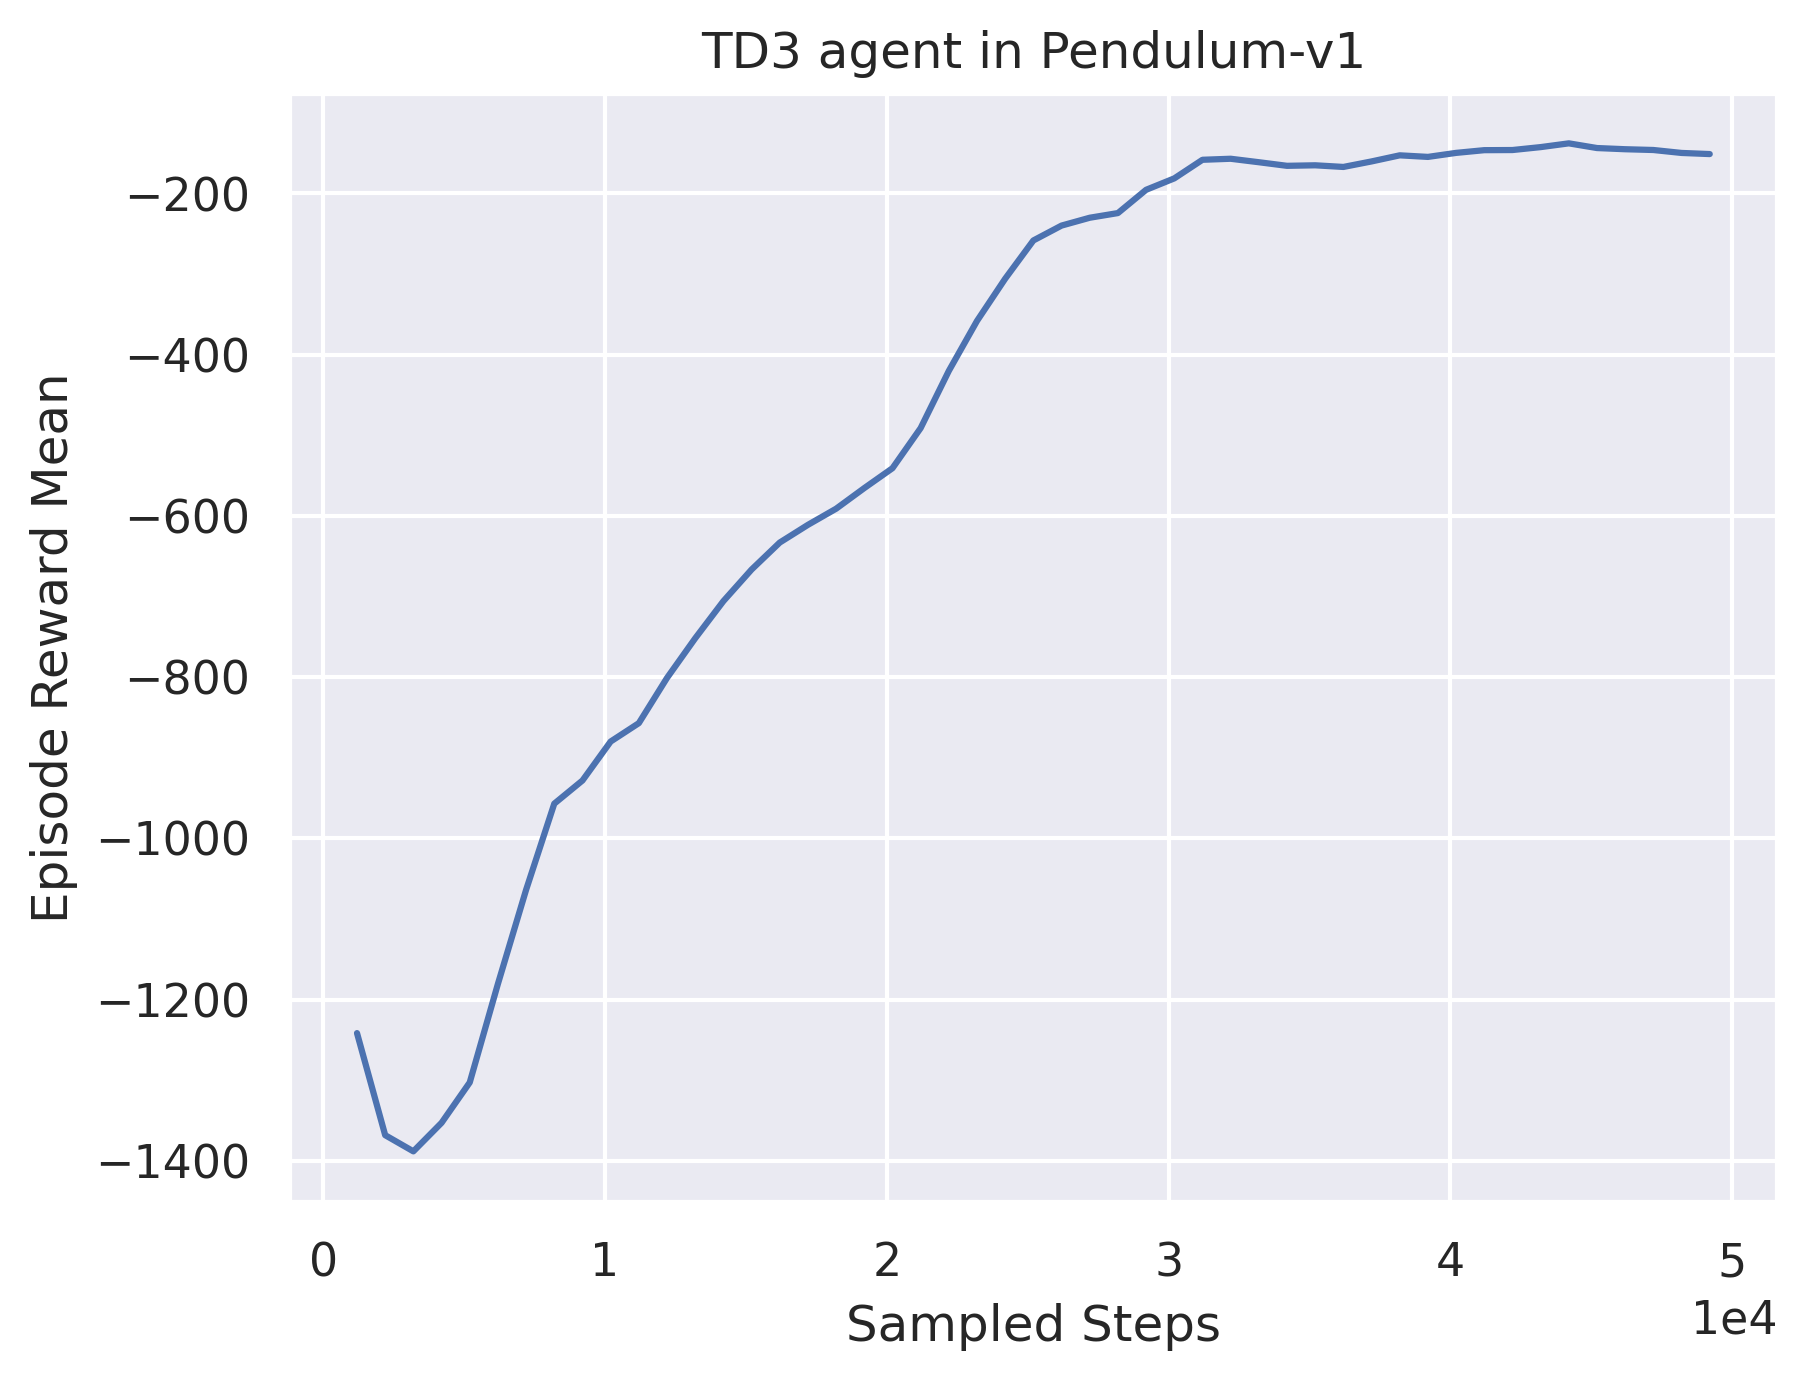

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
# ax.annotate("REFERENCE", (0, -500), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Hard-v0


In [ ]:
!python train_td3.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000


/content/gdrive/MyDrive/cs260r/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.3
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20
Training Step:   2% 1990/100000 [00:06<06:49, 239.46it/s]
 ===== TD3 Training Step 1999 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 8.575777588529053
  frame_per_second: 312
  log_dir: MetaDrive-Tut-Hard-v0
  success_rate: 0.0
  target_q: .nan
  total_episodes: 2
  total_steps: 1999
  total_time: 6.39926743

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'current_q2', 'reward'],
      dtype='object')


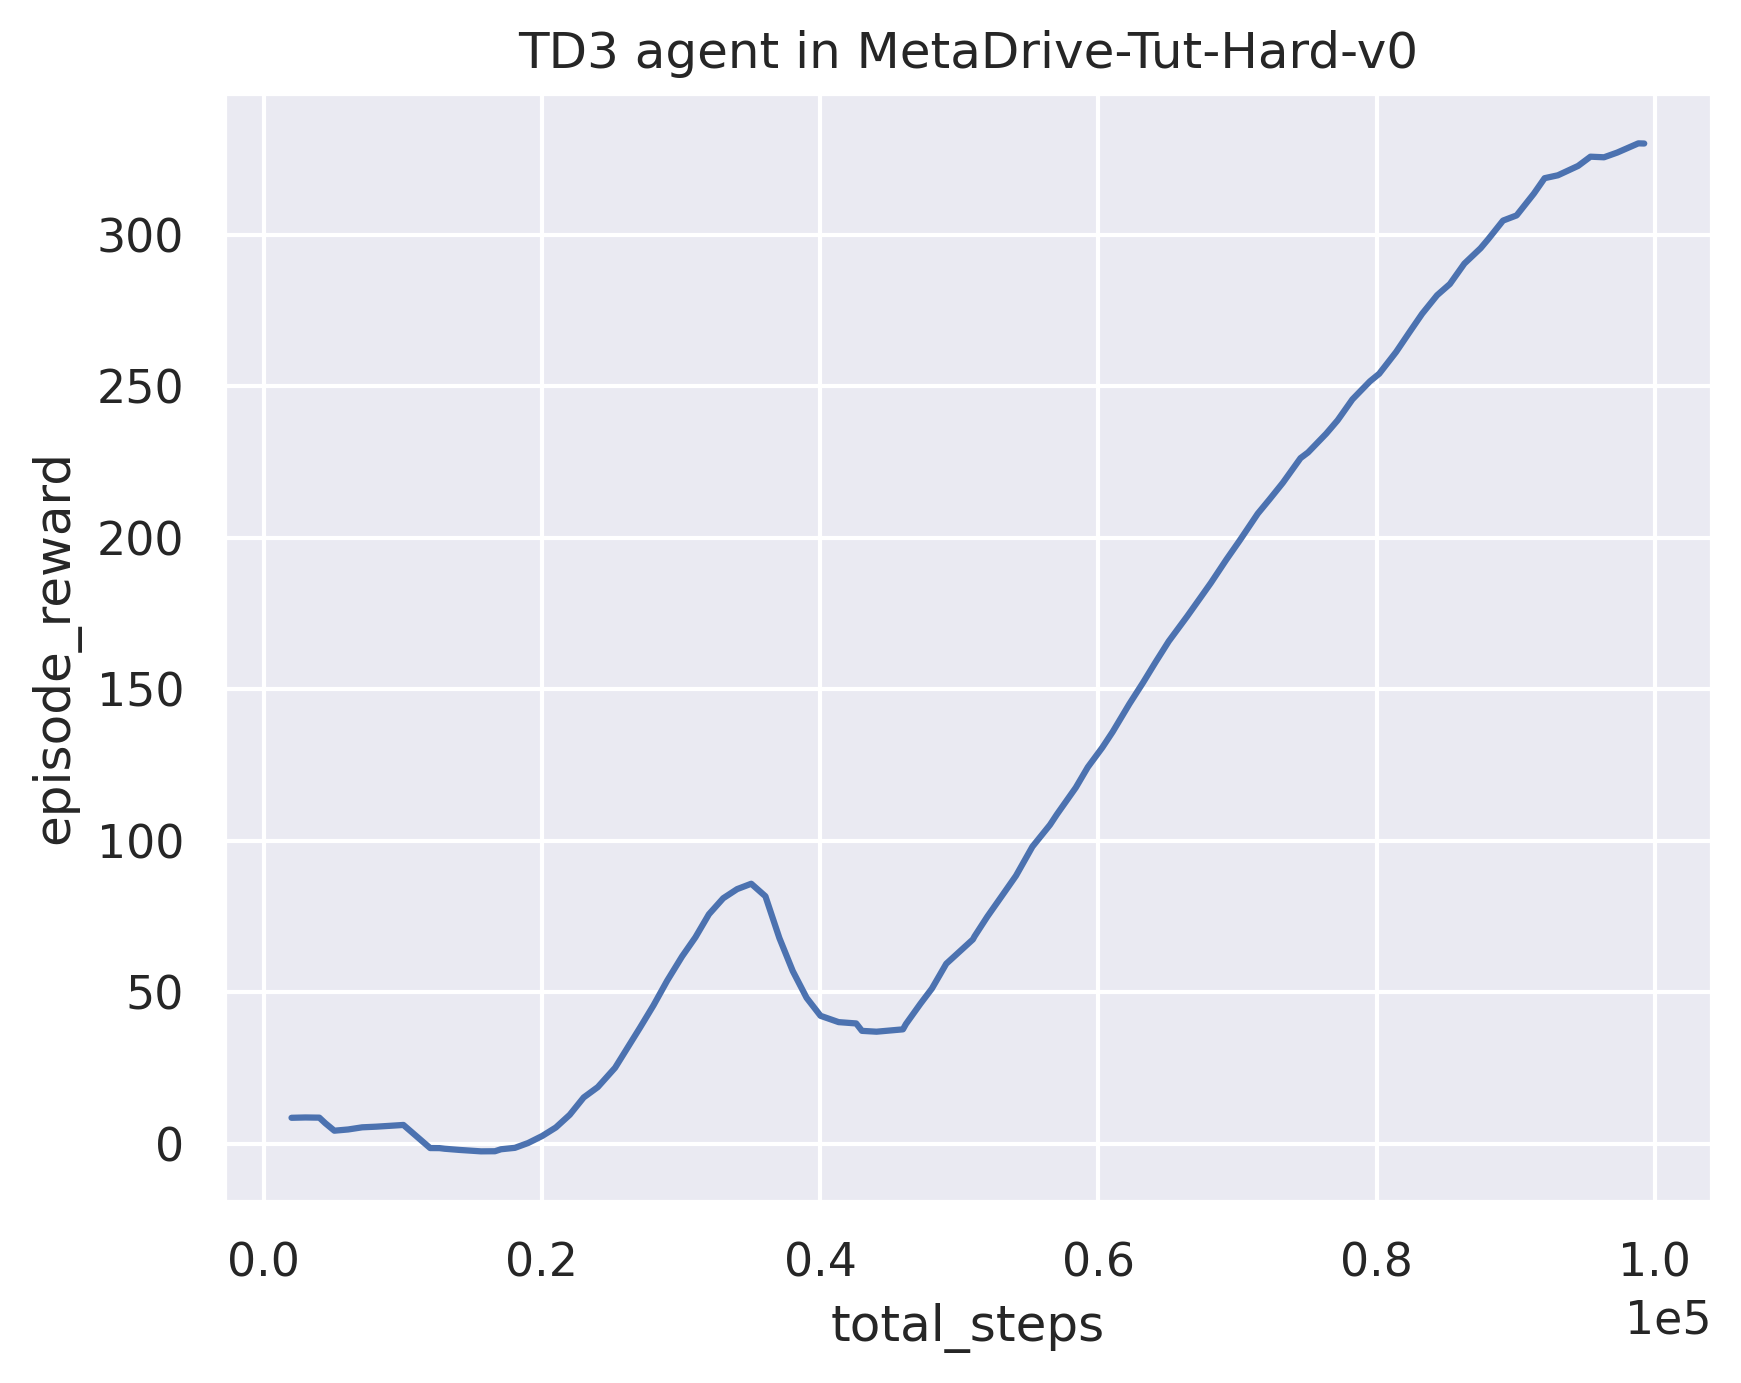

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: You should remove this line in your code.
# ax.annotate("REFERENCE", (0, 200), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.3: Evaluate TD3 in MetaDrive

In [ ]:
!python eval_td3.py \
--env-id="MetaDrive-Tut-Hard-v0" \
--log-dir="MetaDrive-Tut-Hard-v0/td3"


/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  logger.warn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

td3_eval = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/eval_results.csv")
print("TD3 agent average reward: {}".format(td3_eval.rewards.mean()))

TD3 agent average reward: 272.07785041972807


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation, namely the bias, and the variance of the advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [23]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

/content/gdrive/MyDrive/cs260r/core
Start training!
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
  0% 0/300000 [00:00<?, ?it/s]
 ===== ppo Training Iteration 0 =====:
  adv_mean: 8.449318885803223
  entropy: 0.6853826612998277
  episode_reward: 21.12
  frame_per_second: 591
  grad_norm: 38.66440873146057
  iteration: 0
  log_dir: /content/gdrive/MyDrive/cs260r/CartPole-v1/ppo
  policy_loss: -0.01654747610177415
  ratio: 0.999980857815498
  total_episodes: 903
  total_loss: 59.073384099128916
  total_steps: 20000
  total_time: 33.8093638420105
  value_loss: 59.08993166410006

Trainer is saved at </content/gdrive/MyDrive/cs260r/CartPole-v1/ppo/checkpoint-iter0.pkl>. Progress is 

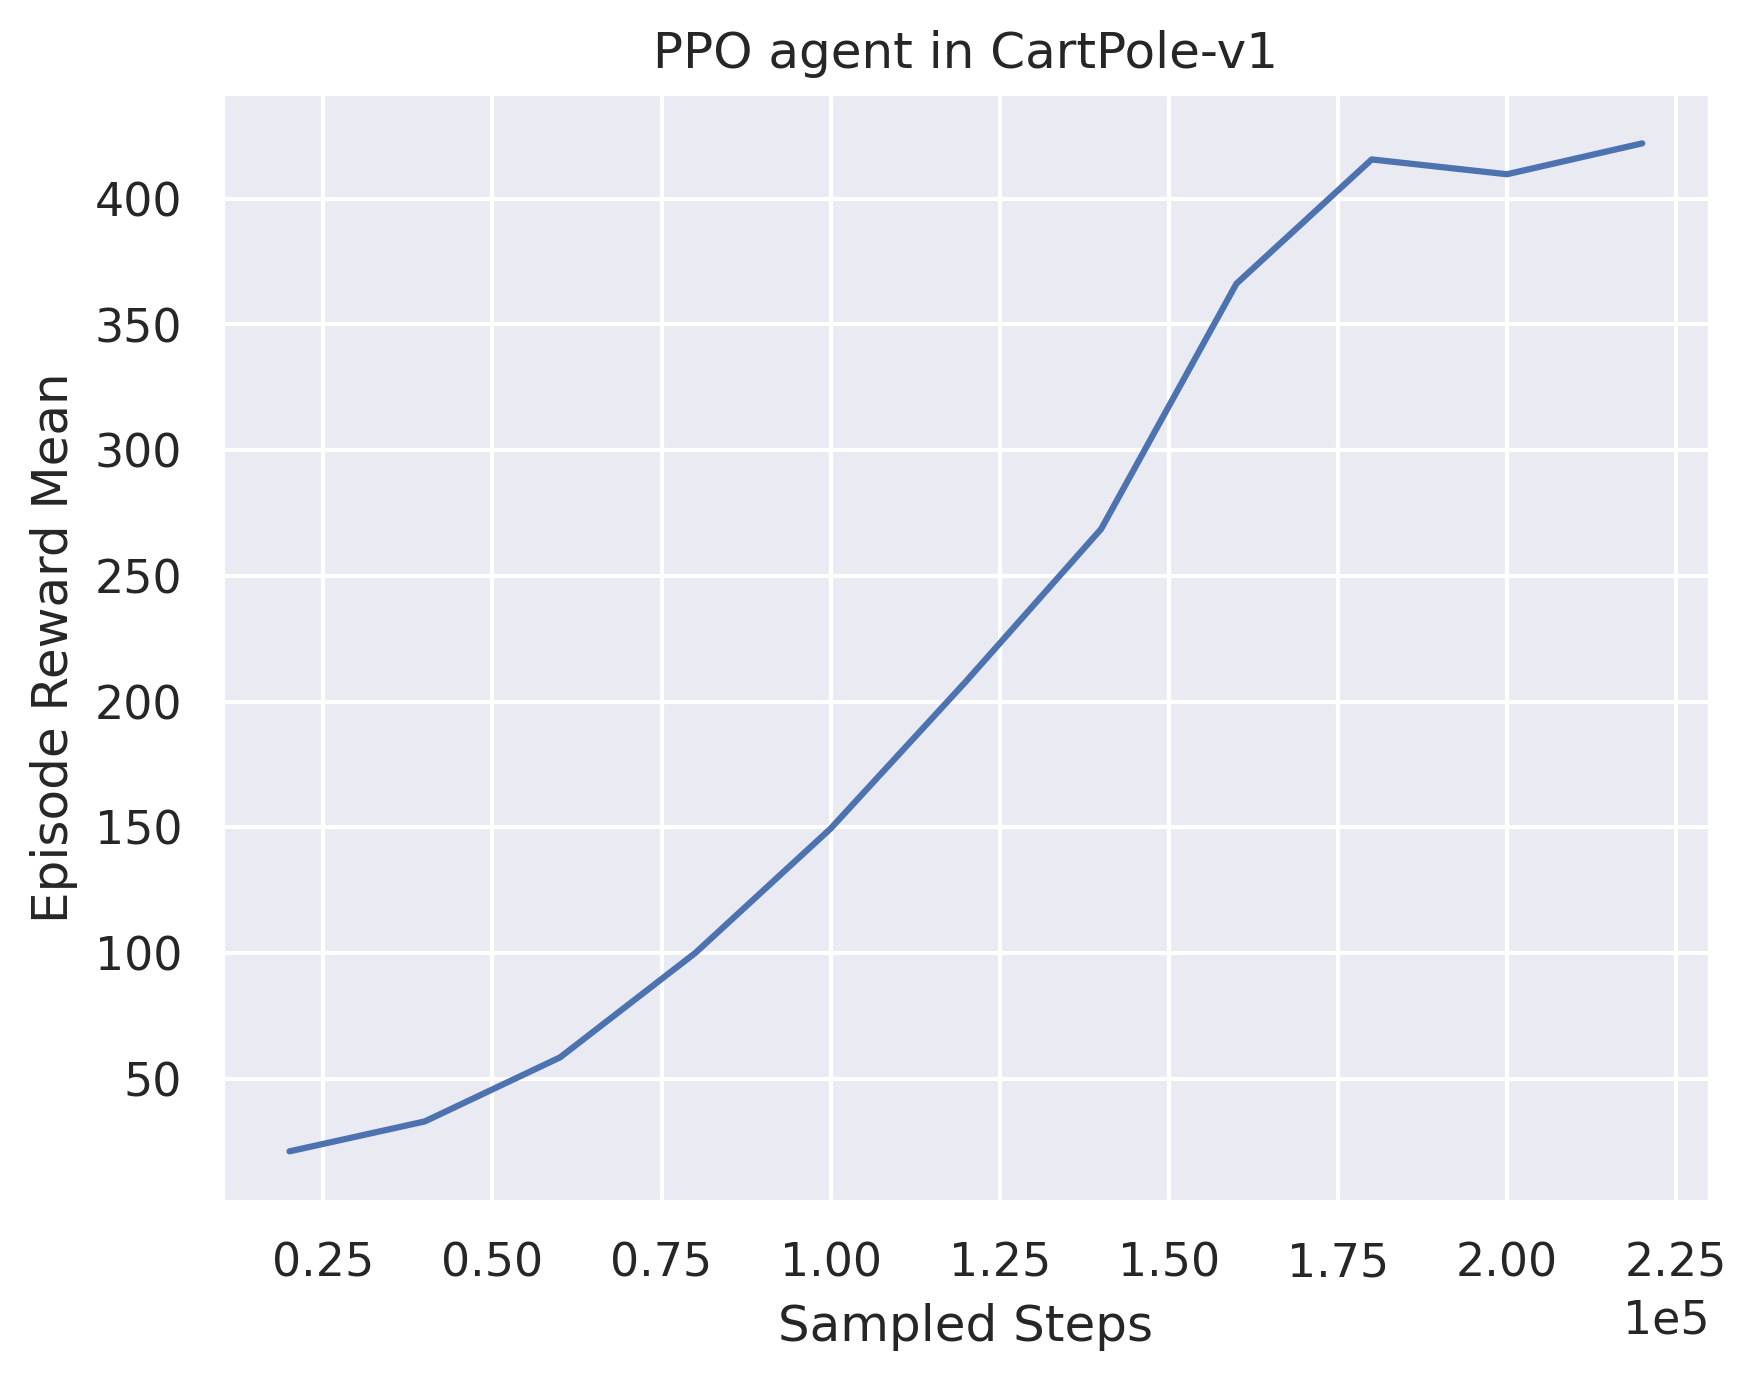

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:
# ax.annotate("REFERENCE", (ax.get_xlim()[1] / 10, ax.get_ylim()[1]*6/10), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Hard Env.

In [26]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Hard-v0 \
  --log-dir MetaDrive-Tut-Hard-v0 \
  --num-envs 10 \
  --max-steps 1_000_000

/content/gdrive/MyDrive/cs260r/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
Start training!
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v

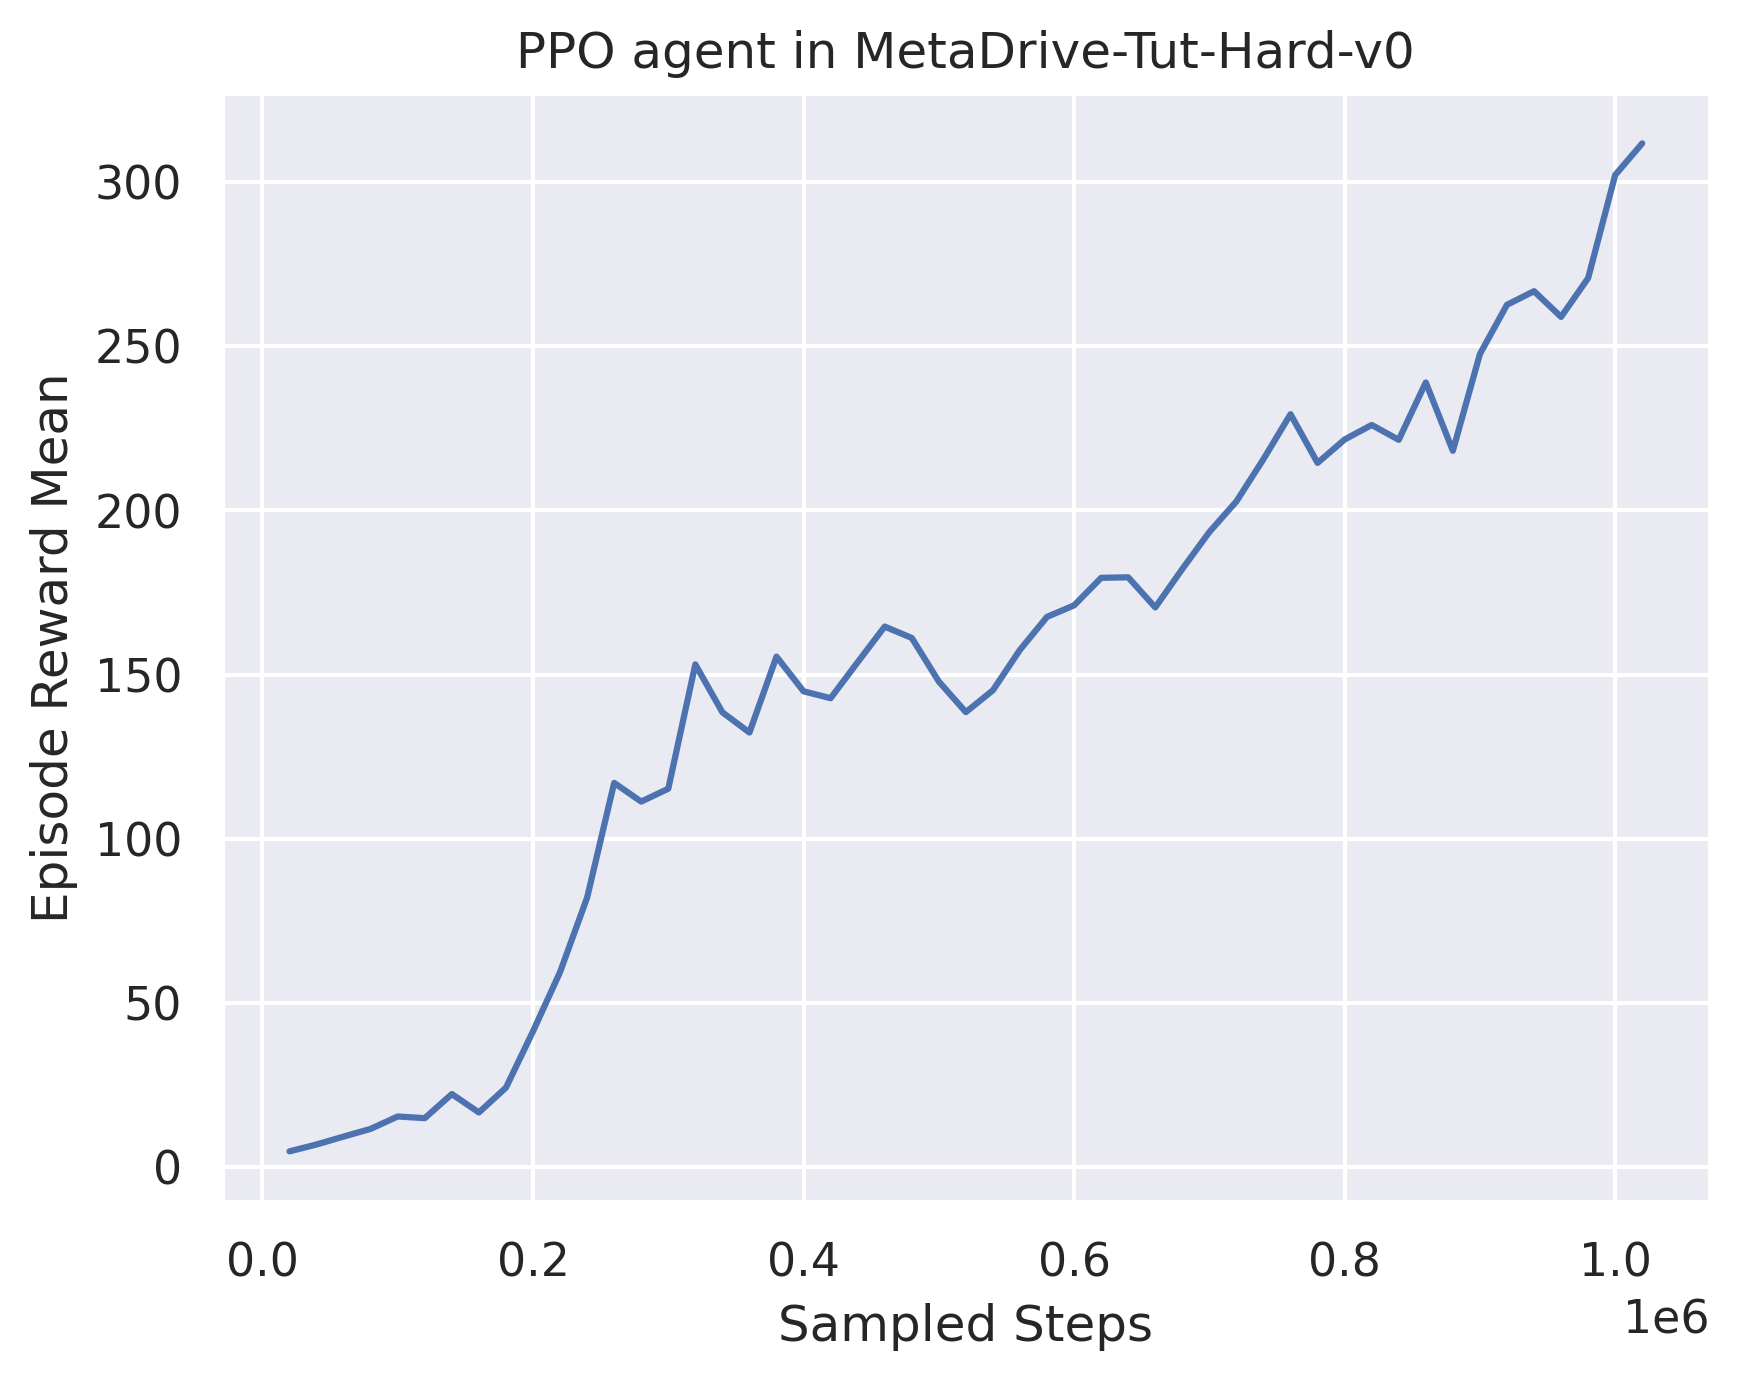

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line
# ax.annotate("REFERENCE", (0, ax.get_ylim()[1]*6/10), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.3: Evaluate PPO in MetaDrive

In [10]:
!pip install mediapy
!python eval_ppo.py \
  --env-id="MetaDrive-Tut-Hard-v0" \
  --log-dir="MetaDrive-Tut-Hard-v0/ppo"

/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  logger.warn

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_eval = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/eval_results.csv")
print("PPO agent average reward: {}".format(ppo_eval.rewards.mean()))

PPO agent average reward: 234.3238428562236


### Demo 3.4: Visualize the performance of PPO in MetaDrive Hard Env.

You might have different maps in your visualization, that's expected.

In [12]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1,
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)


# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy,
    num_episodes=1,
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

animate(eval_info["frames"])

print("PPO agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

/content/gdrive/MyDrive/cs260r/core
/content/gdrive/MyDrive/cs260r/core


[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000


Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']


/content/gdrive/MyDrive/cs260r/core/ppo_trainer.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_path, torch.device('cpu') if not torch.cud

Successfully load weights from /content/gdrive/MyDrive/cs260r/MetaDrive-Tut-Hard-v0/ppo/checkpoint-final.pkl!


[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.008
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 19.474
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 67.233
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 122.428
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 142.324
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 185.453
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 222.440
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 278.345


PPO agent achieves 326.24026449586233 return in MetaDrive Hard environment.
